### PRedicting heart disease using machine learning

this notebook looks nto  various python-base ml and ds libraries in an attempt to build a ml model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. data
3. Evaluation
4. Features
5. Modelling
6. Experimentaion

 ### 1 Problem Defintion
 > given clincal parameters about a patient,can we predict  whether or not they have heart disease?



### 2 Data

    id (Unique id for each patient)
    age (Age of the patient in years)
    origin (place of study)
    sex (Male/Female)
    cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
    trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
    chol (serum cholesterol in mg/dl)
    fbs (if fasting blood sugar > 120 mg/dl)
    restecg (resting electrocardiographic results)
    -- Values: [normal, stt abnormality, lv hypertrophy]
    thalach: maximum heart rate achieved
    exang: exercise-induced angina (True/ False)
    oldpeak: ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    ca: number of major vessels (0-3) colored by fluoroscopy
    thal: [normal; fixed defect; reversible defect]
    num: the predicted attribute

### 3 Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept we'll pursure the project.

### 4. Features

**Create data dictionary**

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    target - have disease or not (1=yes, 0=no) (= the predicted attribute)


### Preparing the tools

We're going to use pandas , matplotlib ,numpy,sklearn and seaborn

In [52]:
#import all the tools we need

#Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
# we want our plots to appear inside the notebook

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

### Load data

In [53]:
df=pd.read_csv("heart-disease(1)(1).csv")

In [54]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are u trying to solve?
2. what kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers ad why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

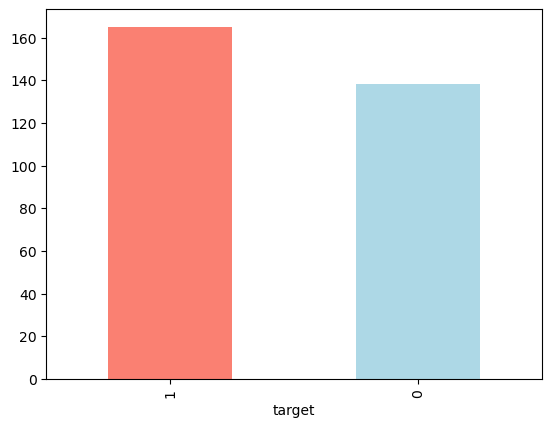

In [57]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [58]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [59]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [60]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [61]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


<Axes: xlabel='target'>

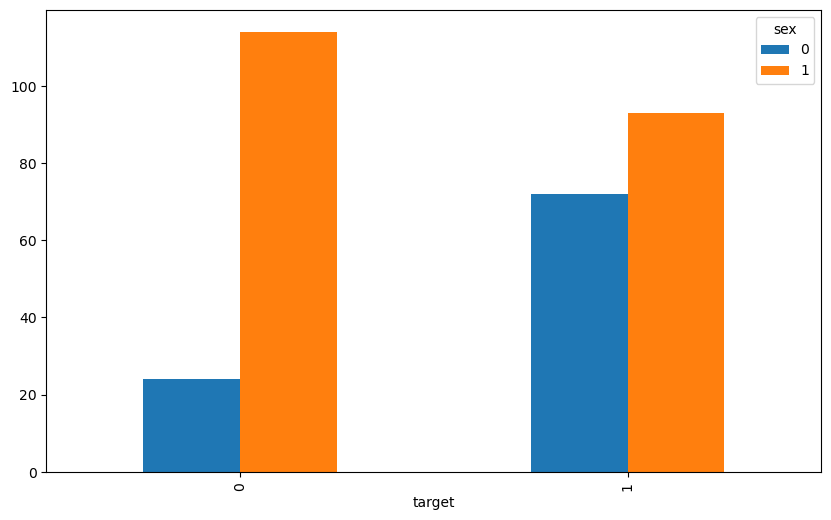

In [62]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6))

### Age vs. Max Heart Rate for Heart Disease

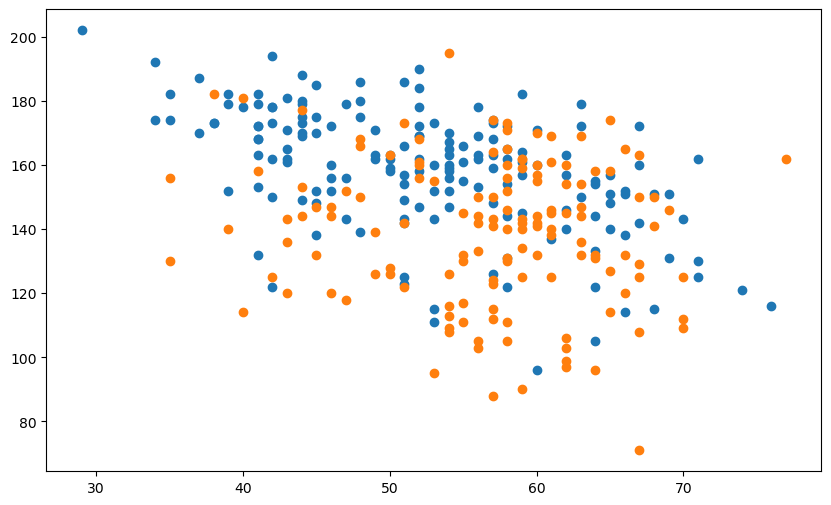

In [63]:
#Create another figure
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1])

#Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0])

<Axes: ylabel='Frequency'>

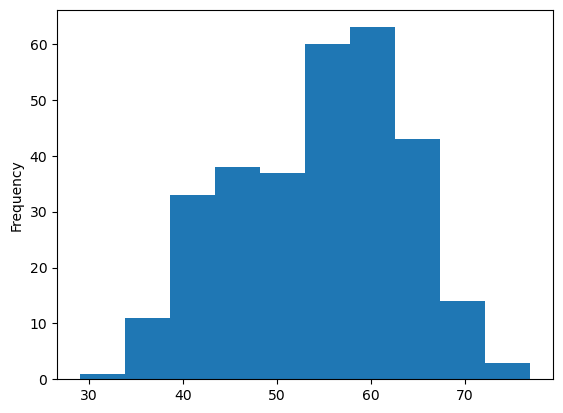

In [64]:
#Check the distribution of the age column with a histogram
df.age.plot.hist()

### Heart Disease Frequency per Chest Pain Type

In [65]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: xlabel='cp'>

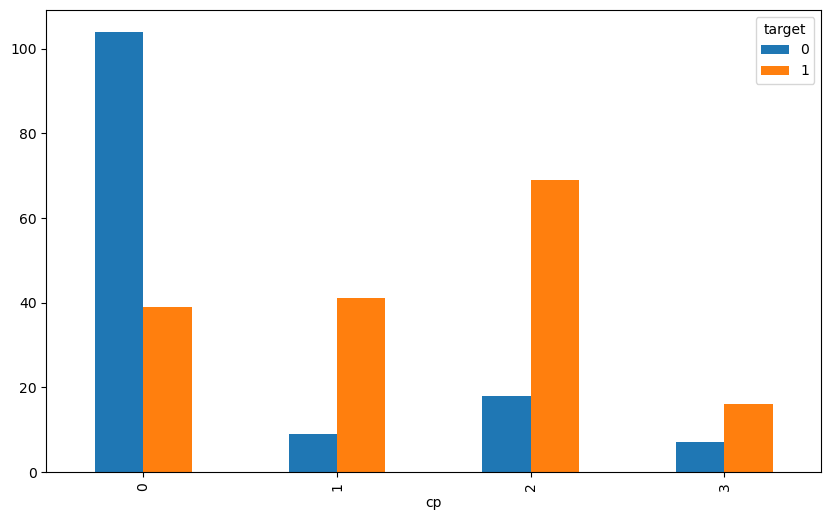

In [66]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6))


### Make a corelation matrix

In [67]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


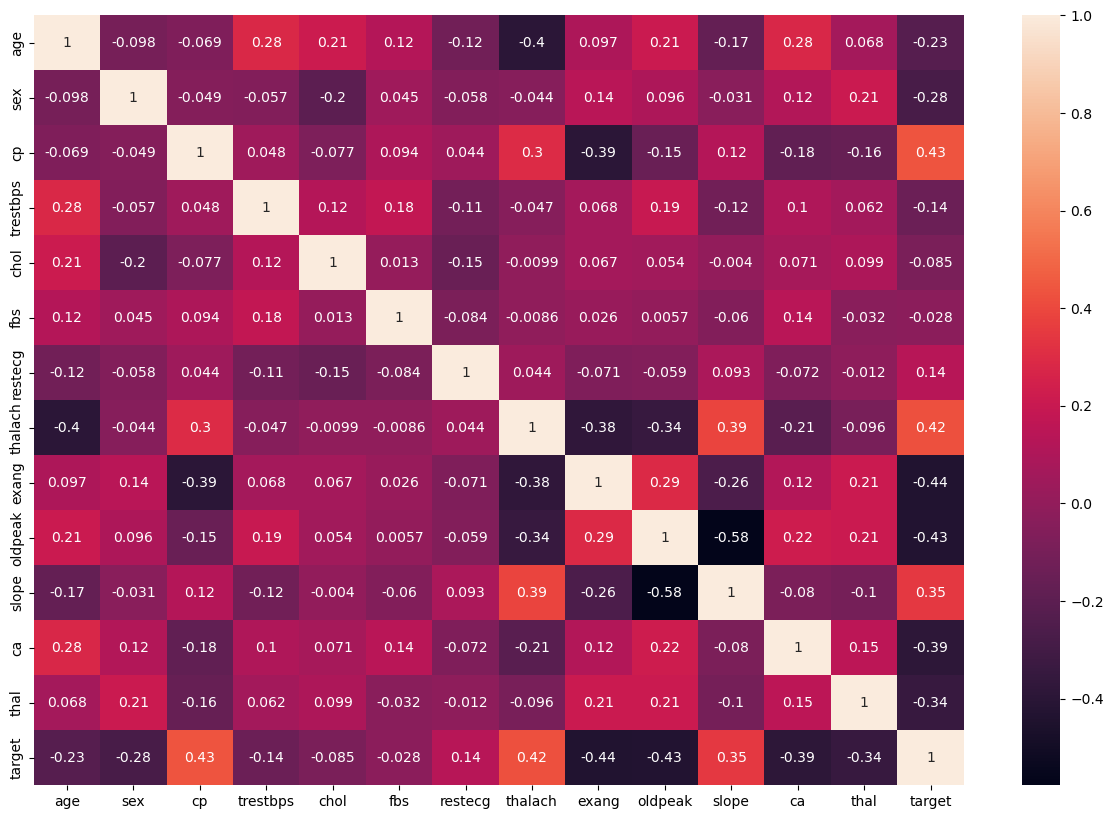

In [68]:
# Let's make our corelation matrix a little prettier
import seaborn as sns
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0)

### 5. Modelling

In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
#Split the data into X and y
X=df.drop("target",axis=1)
Y=df["target"]

In [71]:
np.random.seed(42)

#Split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [72]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [73]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got our data split into training and test set, its time to build a ml model.
We'll train it (find the patterns) on the training set.
and test it on test set
We're going to try 3 differet ml models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [74]:
# Put models in a dictionary
models={"logistic regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

#Create a fn to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        # Fitting
        model.fit(X_train, y_train)
        # Evaluating
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [75]:
# Fit the models and get scores
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
print(model_scores)


{'logistic regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


/home/vansh/Desktop/project-heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Comparison

<Axes: >

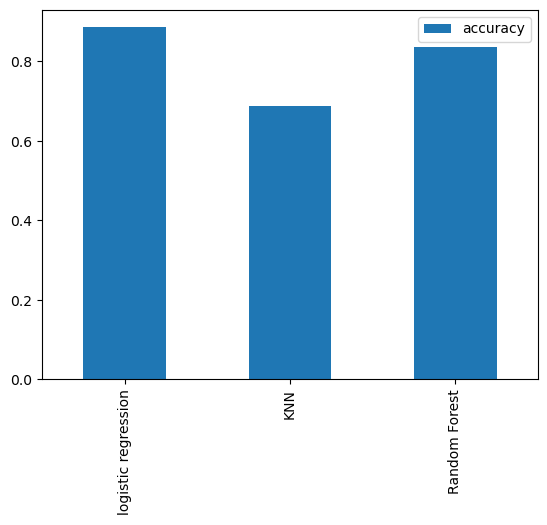

In [76]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

 Now we've got a baseline model... and we know a model's first prediction aren't always what we should base ourt next steps off.
 What should do?
 Let's look at following:
 * Hypyterparamater tuning
 * Feature importance
 * Confusion matrix
 * Cross-validation
 * Precision
 * Recall
 * F1 score
 * Classification report
 * ROC curve
 * Area under the curve AUC)


   ### Hyperparameter tuning
   

In [77]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)
# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Now you can print or plot the scores to see the performance
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

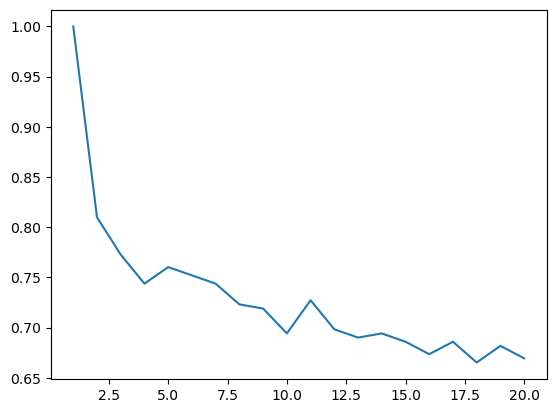

In [78]:
plt.plot(neighbours,train_scores,label="Train score")

### Hyper parameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()
...using RanomdizedSearchCV

In [79]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
        }


Now we've ggot hyperparamerer grids setup for each of our model,let's tune them using RandomizedSearchCV

In [80]:
#Tune LR

np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

#fit random hyperparameter search model
rs_log_reg.fit(X_train,y_train)
rs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

Nowe we've tuned LR, lets do same rsc

In [84]:
np.random.seed(42)


#Setup random hyperparameter search for RandomFRandomForestClassifier
rf_rs=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rf_rs.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [85]:
#Evaluate the randomized search RFClassifier model
rf_rs.score(X_test,y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV

In [86]:

#Different hyperparameters for our LR model
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
        }

In [87]:

np.random.seed(42)

rs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

#fit random hyperparameter search model
rs_log_reg.fit(X_train,y_train)
rs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8852459016393442

### Evaluating our tuned ml classifier , beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [89]:
y_preds=rs_log_reg.predict(X_test)

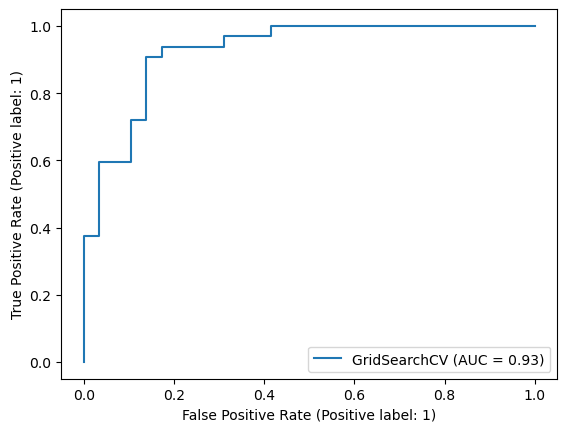

In [96]:
#Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(rs_log_reg, X_test, y_test)

In [97]:
## Confusion matrix
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

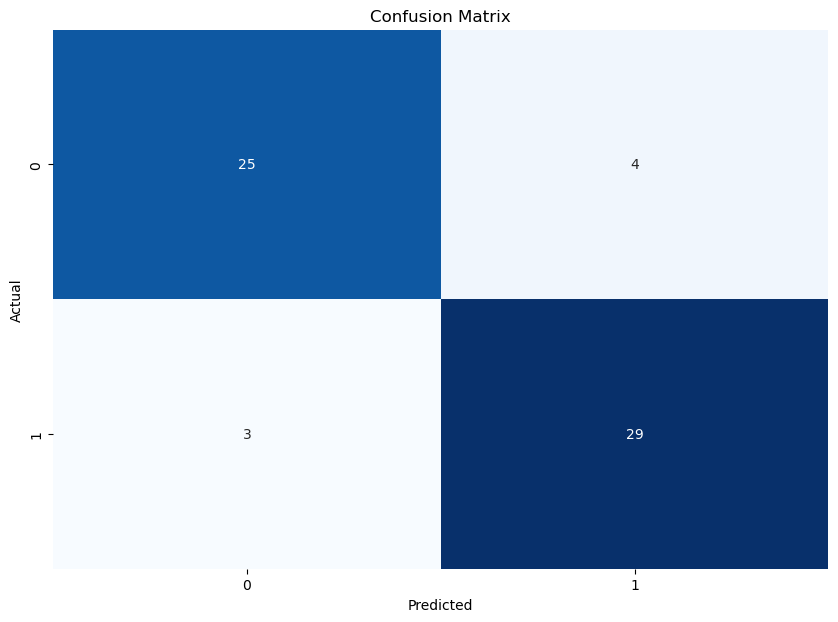

In [100]:
cm = confusion_matrix(y_test, y_preds)

# Create a Seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [102]:
#Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

we're going to calculate precision.,recall and f1 score of our model usong cv and to do so we'll using corss _val score

In [103]:
# Check best hyperparamaters
rs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [104]:
clf=LogisticRegression(C= 0.20433597178569418,solver="liblinear")

In [107]:
# cross-validated accuracy
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")

In [108]:
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [109]:
np.mean(cv_acc)

0.8446994535519124

In [110]:
# precision
cv_precision=cross_val_score(clf,X,Y,cv=5,scoring="precision")

In [111]:
np.mean(cv_precision)

0.8207936507936507

### Feature Importance


In [113]:
# Fit an instance of LR

In [114]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [116]:
#Check coef
clf.coef_

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])